частичные производные

In [ ]:
import sympy as sp

In [3]:
# сейчас мы импортируем sympy, чтобы использовать его для работы с математическими выражениями
# sympy позволяет нам работать с символами, производными и другими математическими операциями
# например, мы можем определить символы и использовать их в выражениях
x = sp.Symbol("x")
y = sp.Symbol("y")  # определяем символы x и y
# теперь мы можем использовать эти символы в математических выражениях
# например, мы можем вычислить частичную производную функции f(x, y) = x^2 + y^2 по x

In [7]:
f = x**2 + 3*x*y + y**2  # определяем функцию f(x, y)
f

x**2 + 3*x*y + y**2

In [8]:
grad_x = sp.diff(f, x)  # вычисляем частичную производную по x
grad_y = sp.diff(f, y)  # вычисляем частичную производную по y
grad_x, grad_y  # выводим частичные производные

(2*x + 3*y, 3*x + 2*y)

In [9]:
point = {x: 1, y: 2}  # определяем точку, в которой будем вычислять градиент
grad_x.subs(point), grad_y.subs(point)  # подставляем значения в частичные производные и выводим результат
# здесь мы подставляем значения x=1 и y=2 в частичные производные
# и получаем значения градиента в этой точке

(8, 7)

In [18]:
grad_f = [sp.diff(f, x), sp.diff(f, y)]
point = {x: 2, y: 3}
grad_value = [g.subs(point) for g in grad_f]
"Градиент в (2, 3) =", grad_value, \
"Градиент =", grad_f

('Градиент в (2, 3) =', [13, 12], 'Градиент =', [2*x + 3*y, 3*x + 2*y])

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

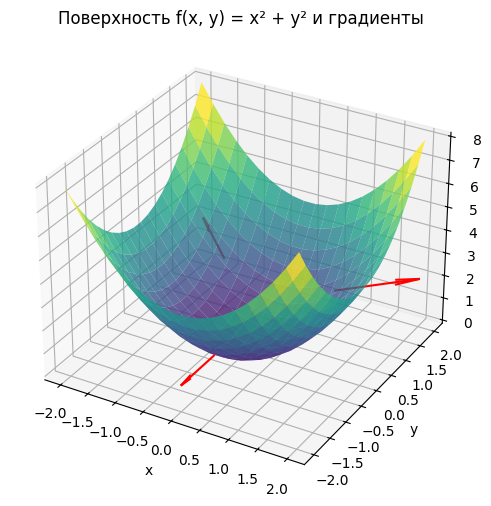

In [30]:
def f(x, y):
    return x**2 + y**2
# создаем сетку точек для построения поверхности
# выбираем по 20 точек в диапазоне от -2 до 2 по каждой оси
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

# создаем двумерную сетку из этих точек
X, Y = np.meshgrid(x, y)
# вычисляем значения функции f на этой сетке
Z = f(X, Y)

# определяем функцию градиента
def grad_f(x, y):
    return np.array([2*x, 2*y])


# выбираем несколько точек для отображения градиентов
points = [(1, 1), (-1, 1), (0, -1)]
# вычисляем градиенты в этих точках
grad_vectors = [grad_f(x, y) for x, y in points]

# создаем 3D-график поверхности функции и отображаем градиенты
fig = plt.figure(figsize=(10, 6))
# создаем 3D-ось
ax = fig.add_subplot(111, projection='3d')
# строим поверхность функции
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# отображаем градиенты в выбранных точках
for (x, y), grad in zip(points, grad_vectors):
    ax.quiver(x, y, f(x, y), grad[0], grad[1], 0, length=0.5, color='red')

# задаем метки осей и заголовок
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('Поверхность f(x, y) = x² + y² и градиенты')
plt.show()

In [31]:
import numpy as np
def f(x, y):
    return x**2 + y**2
x, y = 1, 1
h = 0.001
df_dx = (f(x + h, y) - f(x, y)) / h
df_dy = (f(x, y + h) - f(x, y)) / h
numerical_gradient = [df_dx, df_dy]
print("Численный градиент в (1, 1):", numerical_gradient)
analytical_gradient = [2*x, 2*y]
print("Аналитический градиент в (1, 1):", analytical_gradient)
print("Совпадают?", np.allclose(numerical_gradient, analytical_gradient, atol=0.01))

Численный градиент в (1, 1): [2.0009999999999195, 2.0009999999999195]
Аналитический градиент в (1, 1): [2, 2]
Совпадают? True


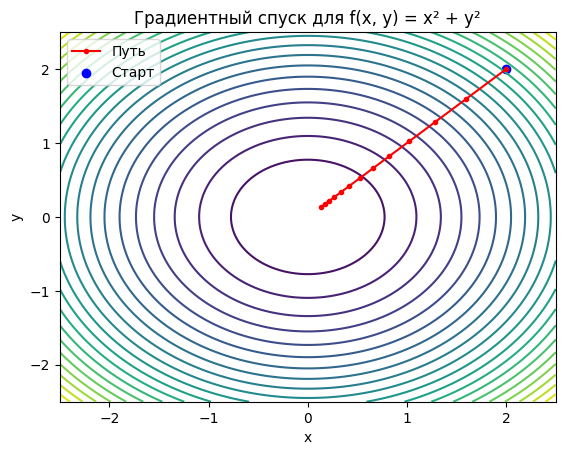

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# объявляем функцию и ее градиент
def f(x, y):
    return x**2 + y**2
def grad_f(x, y):
    return np.array([2*x, 2*y])

# начальная точка и шаг обучения
x, y = 2, 2
eta = 0.1

# список для хранения траектории градиентного спуска
trajectory = [(x, y)]

# выполняем градиентный спуск
for _ in range(12):
    # вычисляем градиент и обновляем координаты
    grad = grad_f(x, y)
    # обновляем координаты
    x -= eta * grad[0]
    y -= eta * grad[1]
    # сохраняем текущую точку в траекторию
    trajectory.append((x, y))

# преобразуем траекторию в массив для удобства
trajectory = np.array(trajectory)
x_vals = np.linspace(-2.5, 2.5, 100)
y_vals = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# строим график функции и траектории градиентного спуска
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', label='Путь')
plt.scatter(trajectory[0, 0], trajectory[0, 1], c='blue', label='Старт')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Градиентный спуск для f(x, y) = x² + y²')
plt.legend()
plt.show()

In [90]:
x, y = sp.symbols('x y')  # определяем символы x и y
z = sp.sin(x**2 + y)
z

sin(x**2 + y)

In [91]:
dz_dx = z.diff(x)
dz_dy = z.diff(y)
dz_dx, dz_dy

(2*x*cos(x**2 + y), cos(x**2 + y))

In [92]:
dz_dx.subs({x: 1, y: 2}), dz_dy.subs({x: 1, y: 2})

(2*cos(3), cos(3))

TypeError: 'list' object is not callable

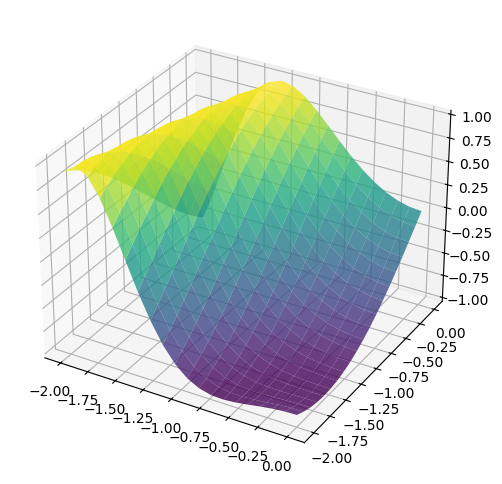

In [93]:
z_lamb = sp.lambdify((x, y), z, "numpy")

x_vector = np.linspace(-2, 0, 20)
y_vector = np.linspace(-2, 0, 20)

# создаем двумерную сетку из этих точек
X, Y = np.meshgrid(x_vector, y_vector)
# вычисляем значения функции f на этой сетке
Z = z_lamb(X, Y)


z_grad = sp.lambdify((x, y), [dz_dx, dz_dy], "numpy")

# выбираем несколько точек для отображения градиентов
points = [(1, 1), (-1, 1), (0, -1)]
# вычисляем градиенты в этих точках
grad_vectors = [z_grad(x, y) for x, y in points]

# создаем 3D-график поверхности функции и отображаем градиенты
fig = plt.figure(figsize=(10, 6))
# создаем 3D-ось
ax = fig.add_subplot(111, projection='3d')
# строим поверхность функции
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# отображаем градиенты в выбранных точках
for (x, y), grad in zip(points, grad_vectors):
    ax.quiver(x, y, f(x, y), grad[0], grad[1], 0, length=0.5, color='red')

# задаем метки осей и заголовок
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('Поверхность f(x, y) = x² + y² и градиенты')
plt.show()

In [ ]:
x, y = sp.symbols('x y')  # определяем символы x и y
f1 = x**2 + y
f2 = x*y
f = [f1, f2]
f

[x**2 + y, x*y]

In [ ]:
J =sp.Matrix([[sp.diff(fi, var) for var in [x, y]] for fi in f])
J

Matrix([
[2*x, 1],
[  y, x]])

In [ ]:
J.subs({x: 2, y: 3})

Matrix([
[4, 1],
[3, 2]])

In [ ]:
jacob = sp.Matrix(f)
jacob.jacobian([x, y])

Matrix([
[2*x, 1],
[  y, x]])

In [108]:
x, y = sp.symbols('x y')
f = x**2 + 3*x*y + y**2
f.func

sp.hessian(f, [y, x])


Matrix([
[2, 3],
[3, 2]])

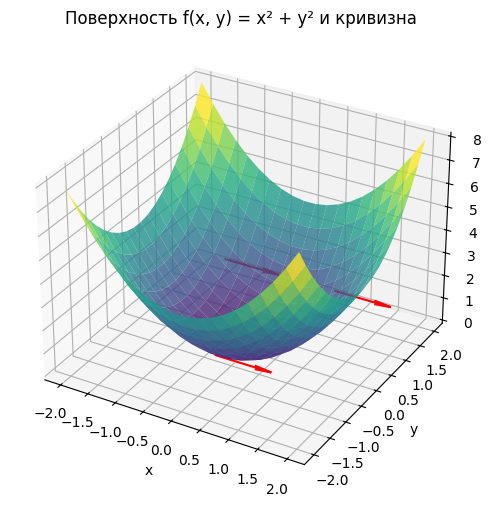

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def f(x, y):
    return x**2 + y**2
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
def hessian_f(x, y):
    return np.array([[2, 0], [0, 2]])
points = [(1, 1), (-1, 1), (0, -1)]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
for x, y in points:
    curvature = hessian_f(x, y)
    ax.quiver(x, y, f(x, y), curvature[0, 0], curvature[0, 1], 0, length=0.5, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('Поверхность f(x, y) = x² + y² и кривизна')
plt.show()

In [135]:
import numpy as np
x1, y1 = sp.symbols('x1 y1')
f1 = x1**2 +10
f = sp.lambdify((x1, y1), f1, "numpy")
grad_f = sp.lambdify((x1, y1), [sp.diff(f1, x1), sp.diff(f1, y1)], "numpy")
hessian_f = sp.lambdify((x1, y1), sp.hessian(f1, [x1, y1]), "numpy")


x, y = 2, 2
gradient = grad_f(x, y)
hessian = hessian_f(x, y)
print(gradient)

step = -np.linalg.inv(hessian).dot(gradient)
x = x + step[0]
y = y + step[1]
print("Новый x:", x)
print("Новый y:", y)
print("Ближе к (0, 0)?", np.allclose([x, y], [0, 0], atol=0.1))

[4, 0]


LinAlgError: Singular matrix

In [157]:
import numpy as np

height = np.array([1.5, 1.7, 1.7, 1.8, 1.9])
weight = np.array([50, 60, 70, 80, 90])
cov = np.cov(height, weight)[0, 1]

corr = np.corrcoef(height, weight)[0, 1]



print("Ковариация:", cov)
print("Корреляция:", corr)

Ковариация: 2.25
Корреляция: 0.9594032236002471


(np.float64(0.0), np.float64(0.0))

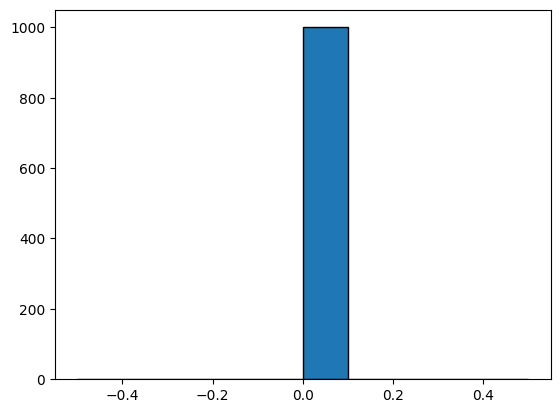

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.binomial(0, 1, 1000)  # генерируем 1000 случайных чисел из нормального распределения

mean = np.mean(data)  # вычисляем среднее значение
var = np.var(data)  # вычисляем дисперсию

plt.hist(data, edgecolor='black')

mean, var

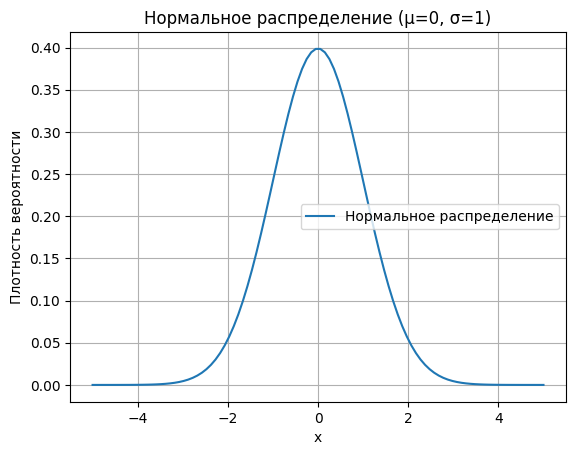

In [179]:
# Параметры
mu = 0  # Среднее
sigma = 1  # Стандартное отклонение

# Генерация точек
x = np.linspace(-5, 5, 100)
pdf = norm.pdf(x, mu, sigma)  # Плотность вероятности

# График
plt.plot(x, pdf, label='Нормальное распределение')
plt.title('Нормальное распределение (μ=0, σ=1)')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

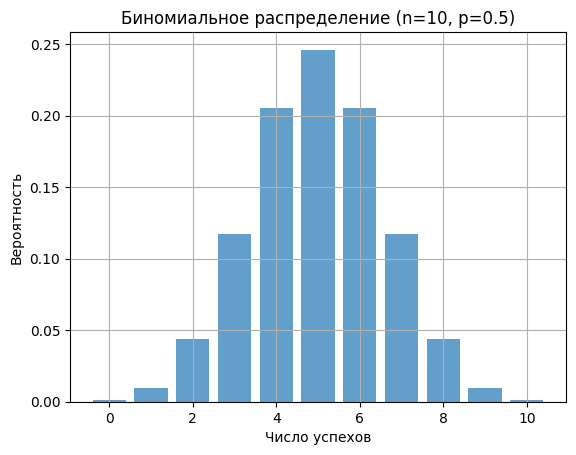

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson

# Параметры
n = 10  # Число испытаний
p = 0.5  # Вероятность успеха

# Генерация точек
k = np.arange(0, n + 1)
pmf = binom.pmf(k, n, p)  # Вероятность массовой функции

# График
plt.bar(k, pmf, align='center', alpha=0.7)
plt.title('Биномиальное распределение (n=10, p=0.5)')
plt.xlabel('Число успехов')
plt.ylabel('Вероятность')
plt.grid()
plt.show()

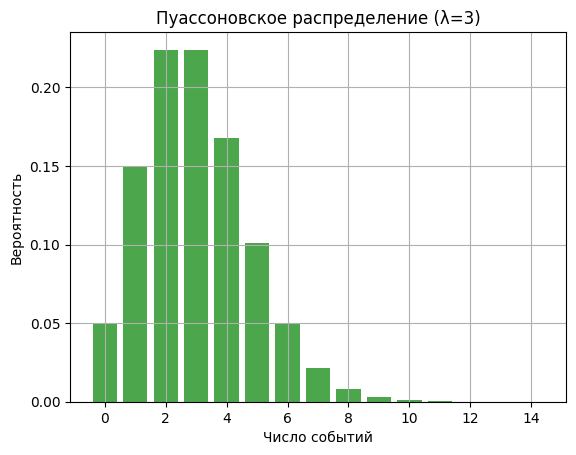

In [180]:
# Параметры
lambda_param = 3  # Среднее число событий

# Генерация точек
k = np.arange(0, 15)
pmf = poisson.pmf(k, lambda_param)  # Вероятность массовой функции

# График
plt.bar(k, pmf, align='center', alpha=0.7, color='green')
plt.title('Пуассоновское распределение (λ=3)')
plt.xlabel('Число событий')
plt.ylabel('Вероятность')
plt.grid()
plt.show()

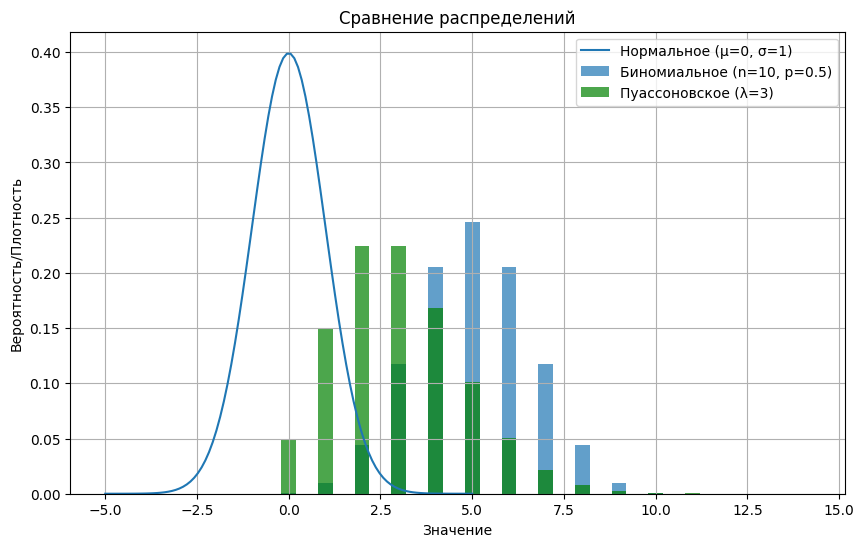

In [181]:
# Нормальное
x_norm = np.linspace(-5, 5, 100)
pdf_norm = norm.pdf(x_norm, 0, 1)

# Биномиальное
k_binom = np.arange(0, 11)
pmf_binom = binom.pmf(k_binom, 10, 0.5)

# Пуассоновское
k_poisson = np.arange(0, 15)
pmf_poisson = poisson.pmf(k_poisson, 3)

# График
plt.figure(figsize=(10, 6))
plt.plot(x_norm, pdf_norm, label='Нормальное (μ=0, σ=1)')
plt.bar(k_binom, pmf_binom, alpha=0.7, label='Биномиальное (n=10, p=0.5)', width=0.4)
plt.bar(k_poisson, pmf_poisson, alpha=0.7, label='Пуассоновское (λ=3)', width=0.4, color='green')
plt.title('Сравнение распределений')
plt.xlabel('Значение')
plt.ylabel('Вероятность/Плотность')
plt.legend()
plt.grid()
plt.show()

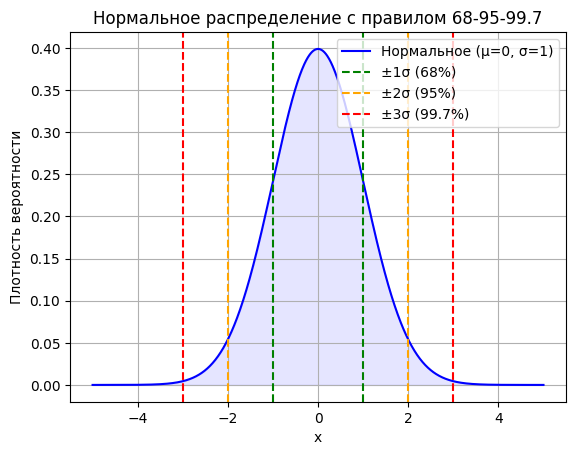

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Параметры
mu = 0  # Среднее
sigma = 1  # Стандартное отклонение

# Генерация точек
x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, mu, sigma)  # Плотность вероятности

# График
plt.plot(x, pdf, label=f'Нормальное (μ={mu}, σ={sigma})', color='blue')
plt.fill_between(x, pdf, alpha=0.1, color='blue')

# Отметки для правила 68-95-99.7
plt.axvline(mu + sigma, color='green', linestyle='--', label='±1σ (68%)')
plt.axvline(mu - sigma, color='green', linestyle='--')
plt.axvline(mu + 2*sigma, color='orange', linestyle='--', label='±2σ (95%)')
plt.axvline(mu - 2*sigma, color='orange', linestyle='--')
plt.axvline(mu + 3*sigma, color='red', linestyle='--', label='±3σ (99.7%)')
plt.axvline(mu - 3*sigma, color='red', linestyle='--')

plt.title('Нормальное распределение с правилом 68-95-99.7')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

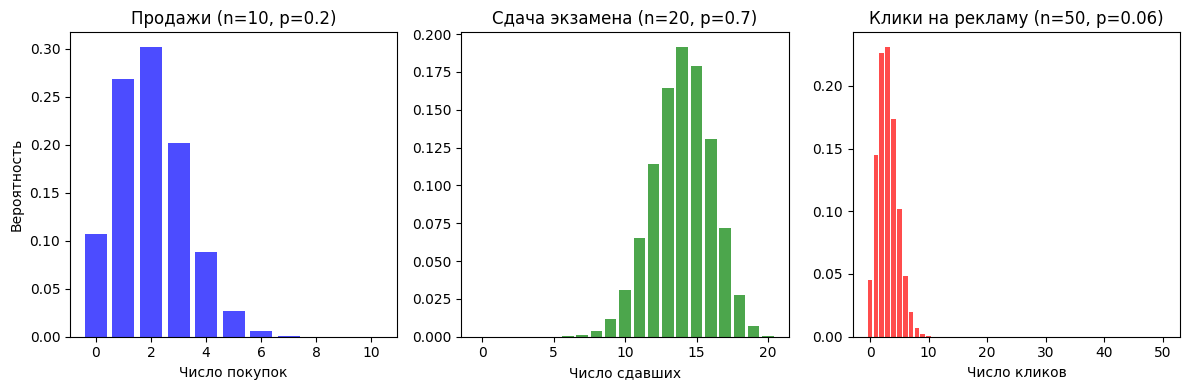

Среднее число продаж: 1.95
Среднее число сдавших: 13.952
Среднее число кликов: 3.017


In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Пример 1: Продажи в магазине
n_sales = 10
p_sales = 0.2
k_sales = np.arange(0, n_sales + 1)
pmf_sales = binom.pmf(k_sales, n_sales, p_sales)

# Пример 2: Сдача экзамена
n_exam = 20
p_exam = 0.7
k_exam = np.arange(0, n_exam + 1)
pmf_exam = binom.pmf(k_exam, n_exam, p_exam)

# Пример 3: Клики на рекламу (реальные данные)
n_clicks = 50
p_clicks = 0.06  # Оценка на основе 3/50
k_clicks = np.arange(0, n_clicks + 1)
pmf_clicks = binom.pmf(k_clicks, n_clicks, p_clicks)

# Визуализация
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(k_sales, pmf_sales, alpha=0.7, color='blue')
plt.title('Продажи (n=10, p=0.2)')
plt.xlabel('Число покупок')
plt.ylabel('Вероятность')

plt.subplot(1, 3, 2)
plt.bar(k_exam, pmf_exam, alpha=0.7, color='green')
plt.title('Сдача экзамена (n=20, p=0.7)')
plt.xlabel('Число сдавших')

plt.subplot(1, 3, 3)
plt.bar(k_clicks, pmf_clicks, alpha=0.7, color='red')
plt.title('Клики на рекламу (n=50, p=0.06)')
plt.xlabel('Число кликов')

plt.tight_layout()
plt.show()

# Симуляция реальных данных
np.random.seed(42)
sales_sim = np.random.binomial(n_sales, p_sales, 1000)
exam_sim = np.random.binomial(n_exam, p_exam, 1000)
clicks_sim = np.random.binomial(n_clicks, p_clicks, 1000)

print("Среднее число продаж:", np.mean(sales_sim))
print("Среднее число сдавших:", np.mean(exam_sim))
print("Среднее число кликов:", np.mean(clicks_sim))

In [198]:
import pandas as pd

data = pd.read_csv('./titanic/train.csv', sep=',')  # Загрузка данных из CSV файла

In [199]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

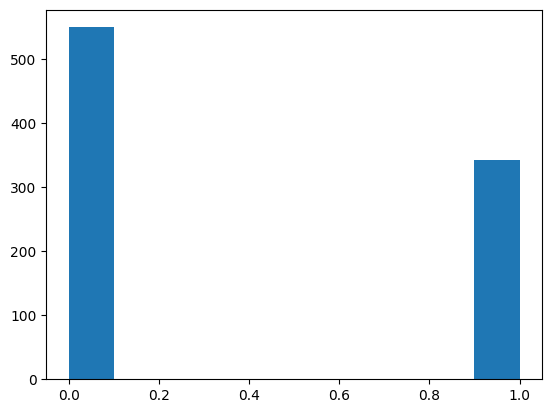

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['Survived'])

In [201]:
len(data)

891

In [205]:
len(data[data['Sex'] == "female"])

314

(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

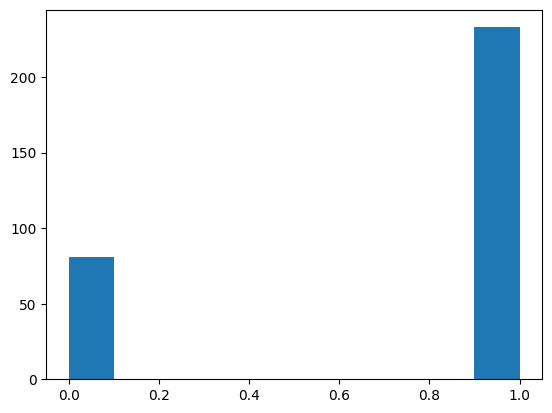

In [209]:
plt.hist(data[data["Sex"] == 'female']['Survived'])

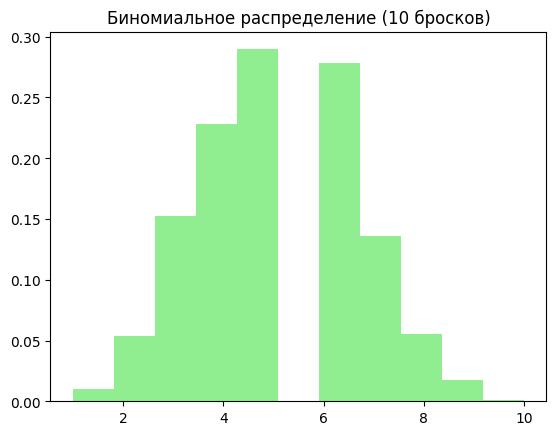

In [211]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.binomial(10, 0.5, 1000)
plt.hist(data, bins=11, density=True, color='lightgreen')
plt.title("Биномиальное распределение (10 бросков)")
plt.show()

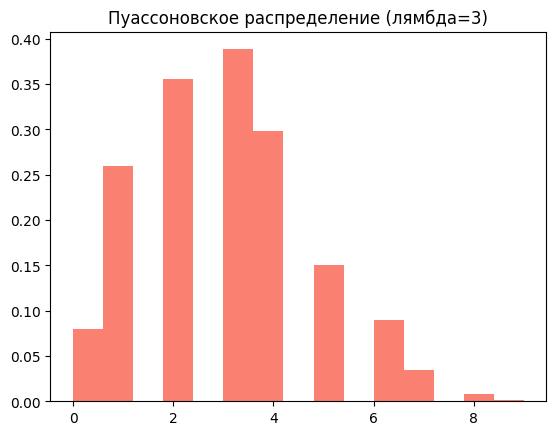

In [212]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.poisson(3, 1000)
plt.hist(data, bins=15, density=True, color='salmon')
plt.title("Пуассоновское распределение (лямбда=3)")
plt.show()

In [213]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [216]:
means = iris.iloc[:, :-1].mean()
means

0    5.843333
1    3.054000
2    3.758667
3    1.198667
dtype: float64

In [217]:
medians = iris.iloc[:, :-1].median()
medians

0    5.80
1    3.00
2    4.35
3    1.30
dtype: float64

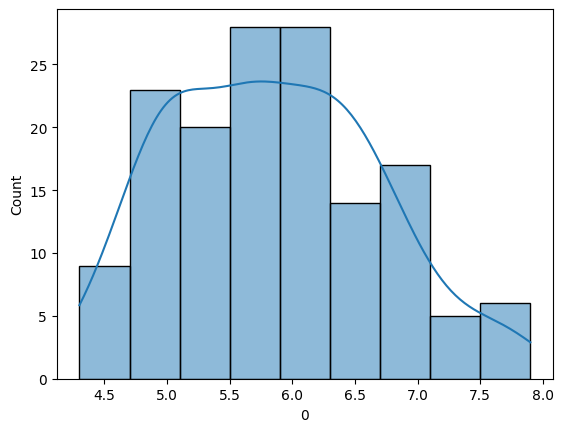

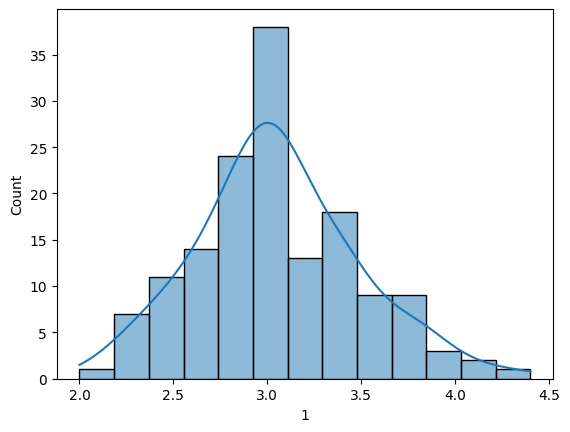

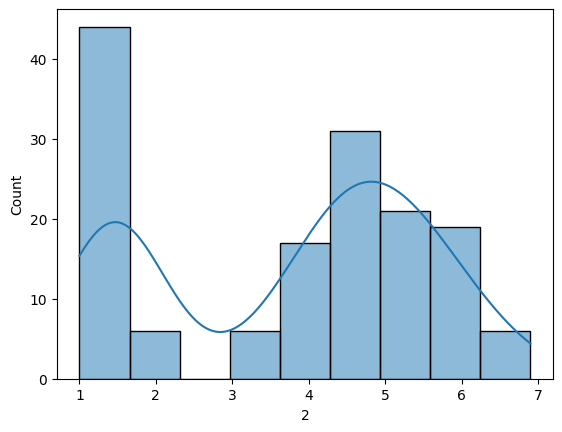

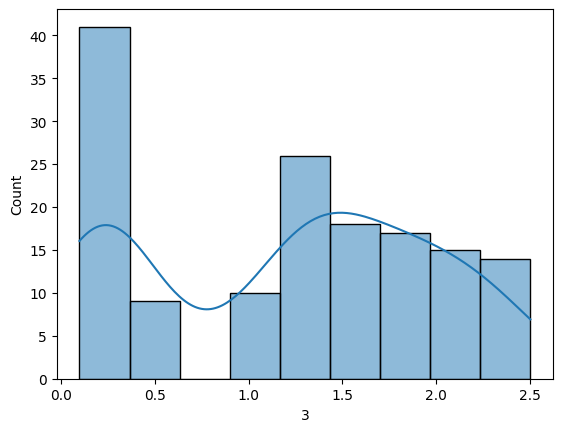

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in range(4):
    sns.histplot(data=iris[column], kde=True)
    plt.show()

In [239]:
Q1 = iris.iloc[:, :-1].quantile(0.25)
Q3 = iris.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1
IQR

0    1.3
1    0.5
2    3.5
3    1.5
dtype: float64

In [241]:
outliers = ((iris.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (iris.iloc[:, :-1] > (Q3 + 1.5 * IQR)))
print("Индексы с выбросами:", np.where(outliers)[0])

Индексы с выбросами: [15 32 33 60]


In [244]:
correlation_matrix = iris.iloc[:, :-1].corr()
correlation_matrix

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

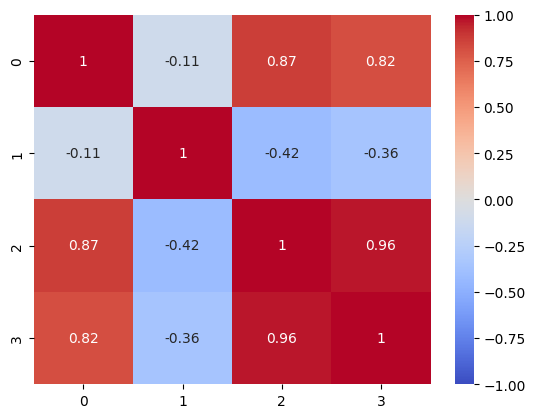

In [246]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show

In [287]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [288]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
means = titanic[['Age', 'Fare', 'Survived']].mean()
means

Age         29.699118
Fare        32.204208
Survived     0.383838
dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

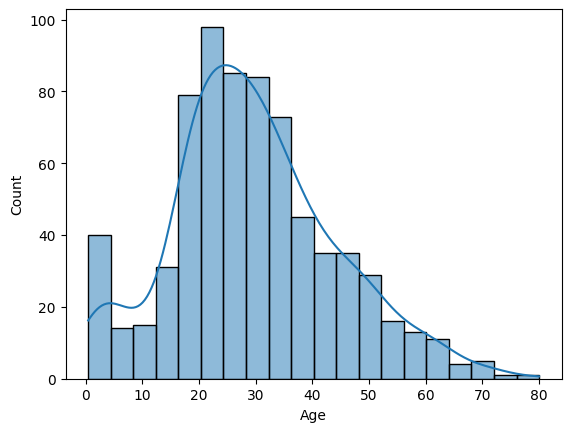

In [290]:
sns.histplot(data=titanic['Age'].dropna(), kde=True)

<Axes: ylabel='Age'>

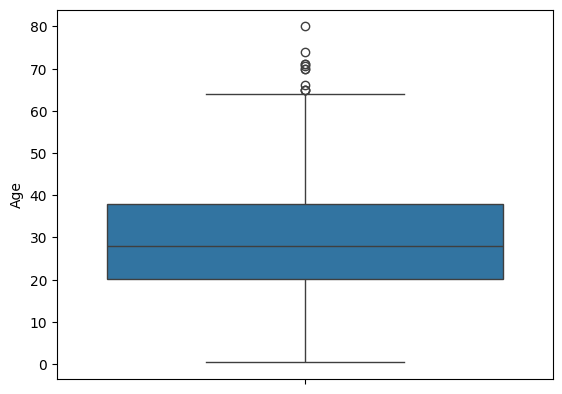

In [291]:
sns.boxplot( data=titanic['Age'])

In [292]:
correlation = titanic['Survived'].corr(titanic['Age'].dropna())
correlation

np.float64(-0.07722109457217767)

<Axes: xlabel='Age', ylabel='Survived'>

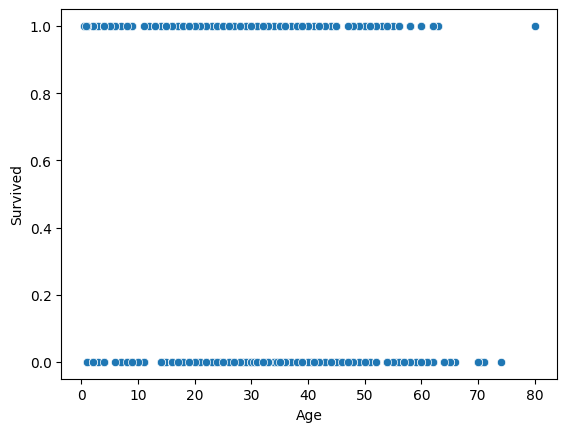

In [293]:
sns.scatterplot(x='Age', y='Survived', data=titanic)

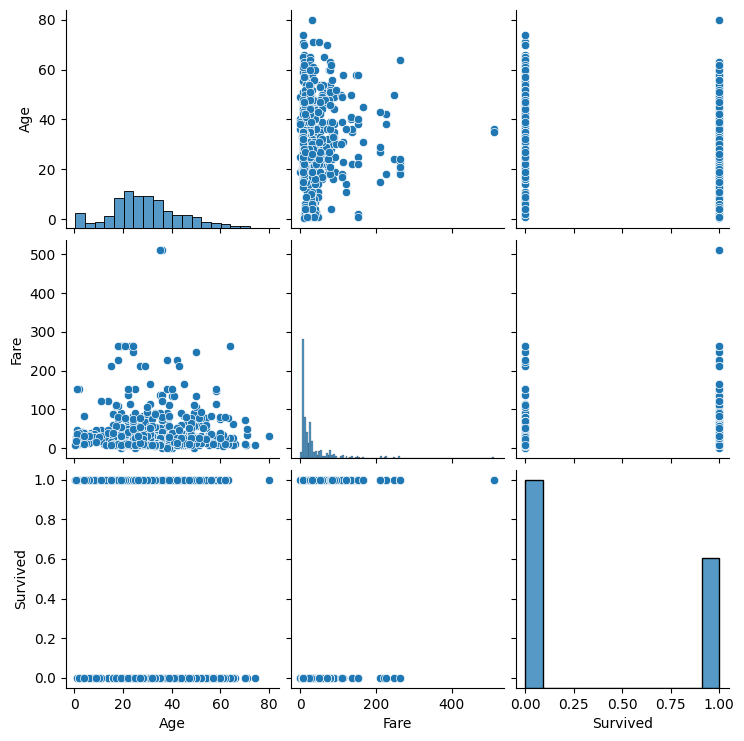

In [294]:
sns.pairplot(titanic[['Age', 'Fare', 'Survived']])

In [295]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
titanic["Sex_Binary"] = titanic["Sex"].map({"male": 0, "female": 1})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [300]:
titanic["Embarked"].fillna('S', inplace=True)  # Заполняем пропуски в столбце 'Embarked' значением 'S'
titanic["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [301]:
titanic['Embarked_Binary'] = titanic["Embarked"].map({"S": 0, "C": 1, "Q": 2})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Binary,Embarked_Binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
titanic["Cabin"].fillna('Unknown', inplace=True)  # Заполняем пропуски в столбце 'Cabin' значением 'Unknown'

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [307]:
new_titanic = titanic[['Age', 'Fare', 'Survived', 'Pclass', 'Sex_Binary', 'Embarked_Binary']].dropna()
new_titanic

,Age,Fare,Survived,Pclass,Sex_Binary,Embarked_Binary
0,22.0,7.2500,0,3,0,0
1,38.0,71.2833,1,1,1,1
2,26.0,7.9250,1,3,1,0
3,35.0,53.1000,1,1,1,0
4,35.0,8.0500,0,3,0,0
...,...,...,...,...,...,...
885,39.0,29.1250,0,3,1,2
886,27.0,13.0000,0,2,0,0
887,19.0,30.0000,1,1,1,0
889,26.0,30.0000,1,1,0,1


<Axes: xlabel='Pclass', ylabel='count'>

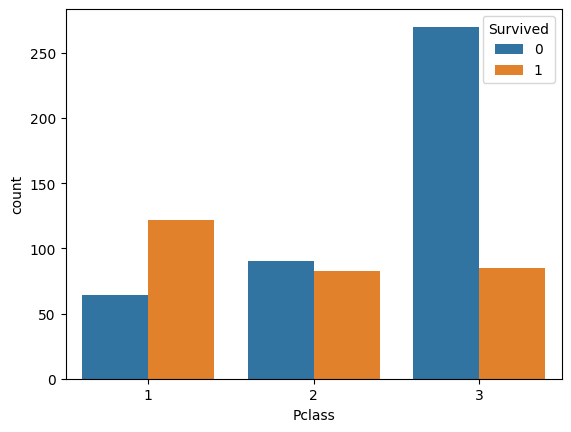

In [309]:
sns.countplot(x='Pclass', hue='Survived', data=new_titanic)

<Axes: xlabel='Sex', ylabel='count'>

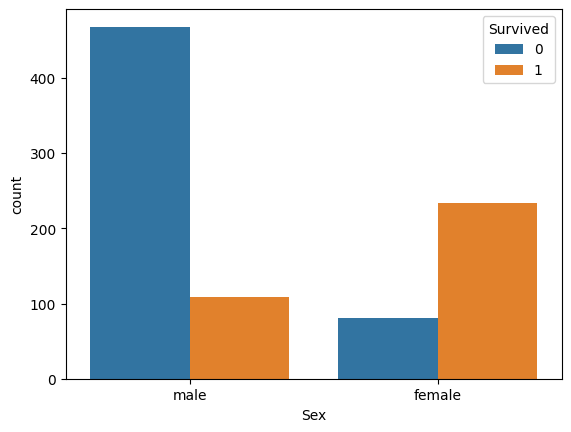

In [310]:
sns.countplot(x='Sex', hue='Survived', data=titanic)

<Axes: xlabel='Pclass'>

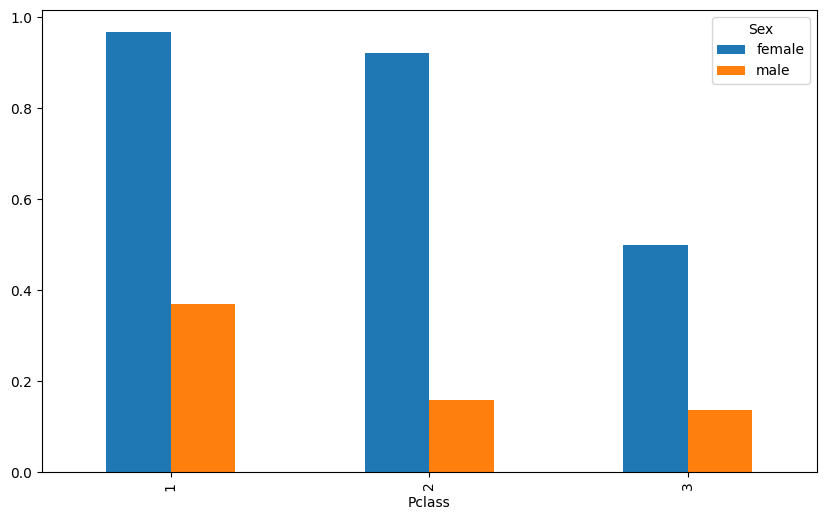

In [312]:
# Среднее выживание по Pclass и Sex
mean_survived = titanic.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Bar plot
mean_survived.plot(kind='bar', figsize=(10, 6))